wordcloud

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.probability import FreqDist


import pandas as pd

final = pd.read_csv('final.csv')

In [35]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/williamyeung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/williamyeung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/williamyeung/nltk_data...


True

In [36]:
sid = SentimentIntensityAnalyzer()

In [6]:
text = final['text']
summary = final['Summary']


In [39]:
def preprocess_text_with_sentiment(text):
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalpha() and sid.polarity_scores(word)['compound'] != 0]
    return ' '.join(filtered_words)






In [43]:
preprocessed_text = text.apply(preprocess_text_with_sentiment)

In [47]:
preprocessed_summary = summary.apply(preprocess_text_with_sentiment)

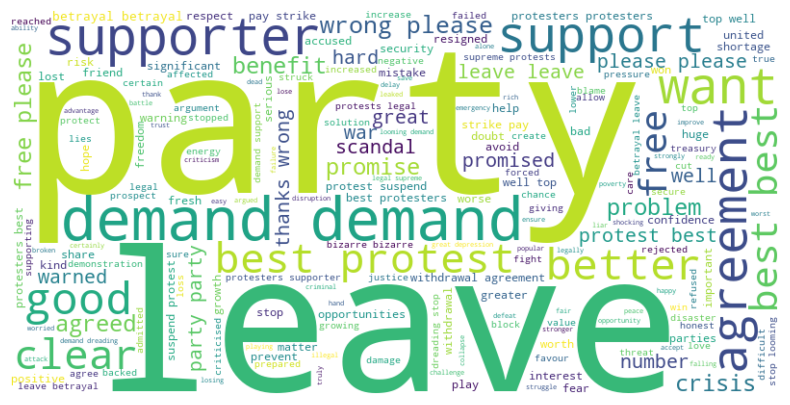

In [46]:
wordcloud_text = WordCloud(width=800, height=400, background_color='white').generate(' '.join(preprocessed_text))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis('off')
plt.show()

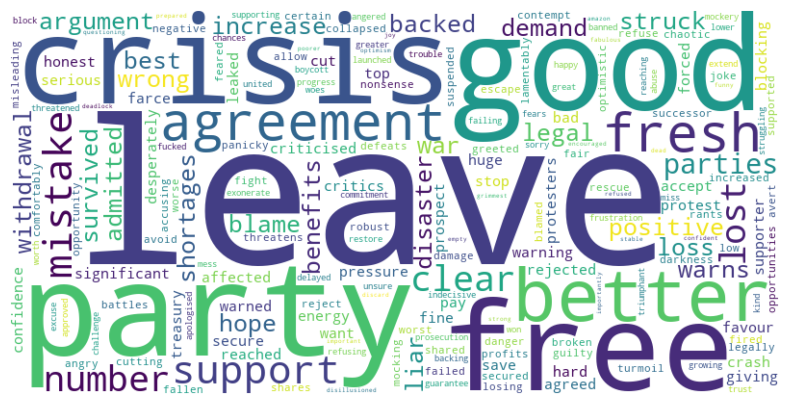

In [49]:
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(' '.join(preprocessed_summary))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.show()

frequency table

In [53]:
def has_sentiment(word):
    sentiment_score = sid.polarity_scores(word)
    return sentiment_score['compound'] != 0


In [81]:
def has_sentiment(word):
    sentiment_score = sid.polarity_scores(word)
    return sentiment_score['compound'] != 0

tokens_text = [word for sentence in text for word in word_tokenize(sentence.lower()) if has_sentiment(word)]
tokens_summary = [word for sentence in summary for word in word_tokenize(sentence.lower()) if has_sentiment(word)]

freq_dist_text = FreqDist(tokens_text)
freq_dist_summary = FreqDist(tokens_summary)

frequency_table_text = pd.DataFrame(freq_dist_text.items(), columns=['Word', 'Frequency'])

frequency_table_summary = pd.DataFrame(freq_dist_summary.items(), columns=['Word', 'Frequency'])

frequency_table_text = frequency_table_text.sort_values('Frequency', ascending=False)

frequency_table_summary = frequency_table_summary.sort_values('Frequency', ascending=False)




             Word  Frequency
46             no        242
12          leave        231
30          party        194
21           best        172
2            like        166
...           ...        ...
859   challenging          1
863     stressing          1
865       widowed          1
866       enjoyed          1
1409     ignoring          1

[1410 rows x 2 columns]


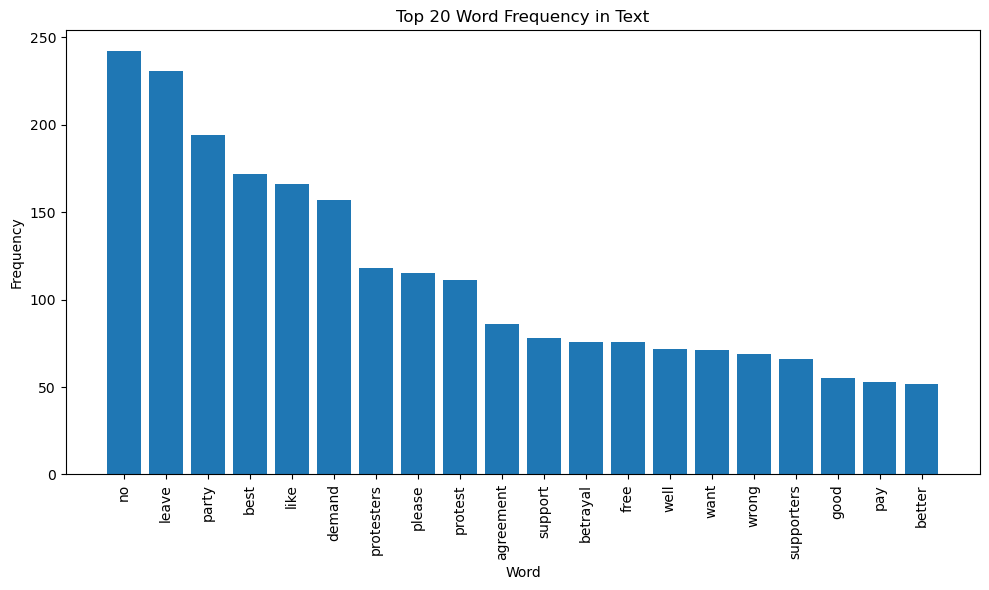

In [85]:
top_20_words_text = frequency_table_text.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_words_text['Word'], top_20_words_text['Frequency'])
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequency in Text')
plt.tight_layout()

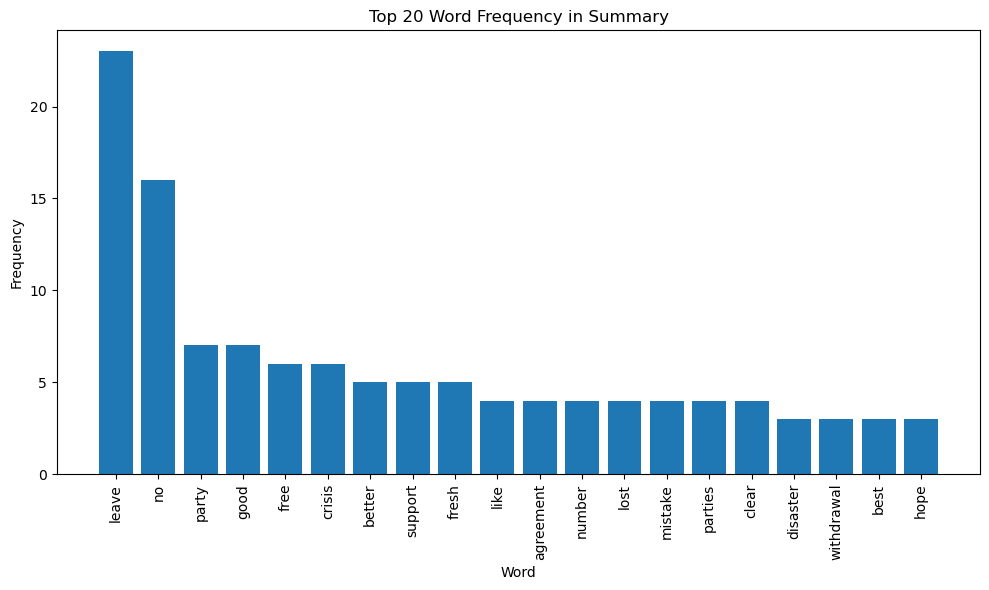

In [86]:
top_20_words_summary = frequency_table_summary.head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_20_words_summary['Word'], top_20_words_summary['Frequency'])
plt.xticks(rotation='vertical')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequency in Summary')
plt.tight_layout()